In [1]:
import numpy as np
import pandas as pd

## Section 1: reading files into dataframes

### Example 1.1: load from csv.

In [9]:
# note Nan, floats, header
!head examples/example1.1.csv

heading1,heading2,heading3
10,10,10
20,10,10
1.5,5,2.4
,5,3
10,1,


In [10]:
df = pd.read_csv('examples/example1.1.csv')
df.head()

heading1  heading2  heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [11]:
# don't accept a header
df = pd.read_csv('examples/example1.1.csv', header=None)
df.head()

0         1         2
0  heading1  heading2  heading3
1        10        10        10
2        20        10        10
3       1.5         5       2.4
4       NaN         5         3

### Example 1.2: load from excel.

## Section 2: slicing and dicing dataframe


In [91]:
!head examples/example1.1.csv
df = pd.read_csv('examples/example1.1.csv')
df.head()

heading1,heading2,heading3
10,10,10
20,10,10
1.5,5,2.4
,5,3
10,1,


heading1  heading2  heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [21]:
# use loc for name indexing: [rows: columns]
df.loc[:,['heading1', 'heading2']]

heading1  heading2
0      10.0        10
1      20.0        10
2       1.5         5
3       NaN         5
4      10.0         1

In [22]:
# note this is reference index "2", not slicing by index, see below
df.loc[:2,:]

heading1  heading2  heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4

In [23]:
# use iloc for index based slicing
# note this is typical non-inclusive python slicing, rather than index reference
df.iloc[:2,[0,1]]

heading1  heading2
0      10.0        10
1      20.0        10

## Section 3: Changing columns and indexes


In [25]:
print(df.columns)
print(df.index)

Index([u'heading1', u'heading2', u'heading3'], dtype='object')
RangeIndex(start=0, stop=5, step=1)


### Example 3.1: Change the full columns

In [28]:
# change column names, caps first letter
df.columns = ['Heading1', 'Heading2', 'Heading3']
df.head()

Heading1  Heading2  Heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

### Example 3.2: specific column names

In [32]:
# axis one is column names, returns a view
df.rename(mapper={'Heading1':'heading1'}, axis=1)

heading1  Heading2  Heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [34]:
# original unchanged
df.head()

Heading1  Heading2  Heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [35]:
# In place
df.rename(mapper={'Heading1':'heading1'}, axis=1, inplace=True)
df.head()

heading1  Heading2  Heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

## Section 4: filtering and changing cells


### Example 4.1 Dropping NaN rows

```
?df.dropna
axis : {0 or 'index', 1 or 'columns'}, or tuple/list thereof
    Pass tuple or list to drop on multiple axes
how : {'any', 'all'}
    * any : if any NA values are present, drop that label
    * all : if all values are NA, drop that label
thresh : int, default None
    int value : require that many non-NA values
subset : array-like
    Labels along other axis to consider, e.g. if you are dropping rows
    these would be a list of columns to include
inplace : boolean, default False
    If True, do operation inplace and return None.
```

In [37]:
df

heading1  Heading2  Heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [38]:
# all values in row have to be NaN
df.dropna(how='all')

heading1  Heading2  Heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [39]:
# drop any row that has a NaN
df.dropna(how='any')

heading1  Heading2  Heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4

In [41]:
# only consider last column, should drop row index=4
# should leave nan in heading1
df.dropna(how='any', subset=['Heading3'])

heading1  Heading2  Heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0

### Example 4.2: Replacing NaN

```
?df.replace
Signature: df.replace(to_replace=None, value=None, inplace=False, 
                      limit=None, regex=False, method='pad', axis=None)
```

In [46]:
df.replace(to_replace=np.nan, value=0)

heading1  Heading2  Heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       0.0         5       3.0
4      10.0         1       0.0

### Example 4.3: Filtering cells using a filter function

In [55]:
def filt_func(cell):
    muitbyself = cell*cell
    return muitbyself

In [58]:
df.apply(filt_func)

heading1  heading2  heading3
0    100.00       100    100.00
1    400.00       100    100.00
2      2.25        25      5.76
3       NaN        25      9.00
4    100.00         1       NaN

In [59]:
df.head()

heading1  heading2  heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [60]:
df['heading3'].apply(filt_func)

0    100.00
1    100.00
2      5.76
3      9.00
4       NaN
Name: heading3, dtype: float64

### Example 4.4: Filter out strings

In [80]:
df

heading1  heading2  heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [81]:
# just replace NaN with a string
df.replace(np.nan, 'Missing', inplace=True)

In [82]:
df.head()

heading1  heading2 heading3
0       10        10       10
1       20        10       10
2      1.5         5      2.4
3  Missing         5        3
4       10         1  Missing

In [83]:
df.convert_objects(convert_numeric=True)

/home/dpidave/miniconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


heading1  heading2  heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [88]:
df = df.apply(pd.to_numeric, errors='coerce')
df 


heading1  heading2  heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [90]:
# now replace NaN with 1
df = df.replace(np.nan, 1)
df

heading1  heading2  heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       1.0         5       3.0
4      10.0         1       1.0

### Example 4.5: Applying logic to a cell

In [92]:
df

heading1  heading2  heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

In [94]:
df['>5'] = ['yes' if x>5 else 'no' for x in df['heading3']]

In [95]:
df

heading1  heading2  heading3   >5
0      10.0        10      10.0  yes
1      20.0        10      10.0  yes
2       1.5         5       2.4   no
3       NaN         5       3.0   no
4      10.0         1       NaN   no

## Section 5: Reshaping data

### Example 5.1: Dealing with catogical data - groupby

In [61]:
!head examples/example5.1.csv
df = pd.read_csv('examples/example5.1.csv')

gene,cat,function
gene1,MF,GO:10
gene2,BF,GO:10
gene3,CC,GO:20
gene4,MF,GO:10
gene5,BF,GO:30
gene6,CC,GO:10
gene7,MF,GO:20
gene8,BF,GO:20
gene9,CC,GO:10


In [52]:
df

gene cat function
0   gene1  MF    GO:10
1   gene2  BF    GO:10
2   gene3  CC    GO:20
3   gene4  MF    GO:10
4   gene5  BF    GO:30
5   gene6  CC    GO:10
6   gene7  MF    GO:20
7   gene8  BF    GO:20
8   gene9  CC    GO:10
9  gene10  MF    GO:10

In [51]:
df.groupby('cat').count()

gene  function
cat                
BF      3         3
CC      3         3
MF      4         4

In [53]:
df.groupby('cat')['cat'].count()

cat
BF    3
CC    3
MF    4
Name: cat, dtype: int64

Text(0,0.5,'')

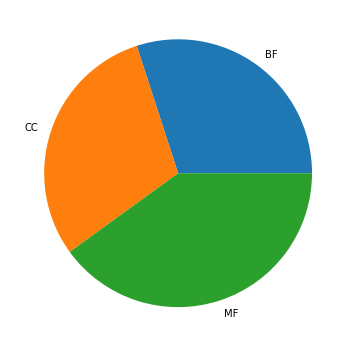

In [78]:
f, ax = plt.subplots(figsize=(6, 6))
ax.axis('equal')
p = df.groupby('cat')['cat'].count()
p
p.plot(kind='pie')
ax.set_ylabel('')

### Example 5.2: Transpose rows into columns

In [64]:
df

gene cat function
0   gene1  MF    GO:10
1   gene2  BF    GO:10
2   gene3  CC    GO:20
3   gene4  MF    GO:10
4   gene5  BF    GO:30
5   gene6  CC    GO:10
6   gene7  MF    GO:20
7   gene8  BF    GO:20
8   gene9  CC    GO:10
9  gene10  MF    GO:10

In [65]:
df.T

0      1      2      3      4      5      6      7      8  \
gene      gene1  gene2  gene3  gene4  gene5  gene6  gene7  gene8  gene9   
cat          MF     BF     CC     MF     BF     CC     MF     BF     CC   
function  GO:10  GO:10  GO:20  GO:10  GO:30  GO:10  GO:20  GO:20  GO:10   

               9  
gene      gene10  
cat           MF  
function   GO:10

In [ ]:
### Example 5.3: Unstack data into multiple index

In [70]:
df.unstack()

gene      0     gene1
          1     gene2
          2     gene3
          3     gene4
          4     gene5
          5     gene6
          6     gene7
          7     gene8
          8     gene9
          9    gene10
cat       0        MF
          1        BF
          2        CC
          3        MF
          4        BF
          5        CC
          6        MF
          7        BF
          8        CC
          9        MF
function  0     GO:10
          1     GO:10
          2     GO:20
          3     GO:10
          4     GO:30
          5     GO:10
          6     GO:20
          7     GO:20
          8     GO:10
          9     GO:10
dtype: object

In [71]:
df.unstack()['cat']

0    MF
1    BF
2    CC
3    MF
4    BF
5    CC
6    MF
7    BF
8    CC
9    MF
dtype: object

In [72]:
df.unstack().index

MultiIndex(levels=[[u'gene', u'cat', u'function'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [74]:
df['cat'][1:9]

1    BF
2    CC
3    MF
4    BF
5    CC
6    MF
7    BF
8    CC
Name: cat, dtype: object

## Section 6: Adding and removing data

### Example 6.1 Droping columns


In [105]:
df

heading1  heading2  heading3   >5
0      10.0        10      10.0  yes
1      20.0        10      10.0  yes
2       1.5         5       2.4   no
3       NaN         5       3.0   no
4      10.0         1       NaN   no

In [109]:
df.drop(labels=['>5'], axis=1, inplace=False)


heading1  heading2  heading3
0      10.0        10      10.0
1      20.0        10      10.0
2       1.5         5       2.4
3       NaN         5       3.0
4      10.0         1       NaN

### Example 6.2: add a column



In [111]:
df['new'] = 0
df.head()

heading1  heading2  heading3   >5  new
0      10.0        10      10.0  yes    0
1      20.0        10      10.0  yes    0
2       1.5         5       2.4   no    0
3       NaN         5       3.0   no    0
4      10.0         1       NaN   no    0

In [123]:
# axis 1, grab column values, ie 10 + 10, else will take sum of all rows
df['sum'] = df.loc[:,['heading1','heading2']].sum(axis=1)

In [127]:
df.loc[:,['heading1','heading2']].sum(axis=1)

0    20.0
1    30.0
2     6.5
3     5.0
4    11.0
dtype: float64

In [129]:
df.loc[:,['heading1','heading2']].sum(axis=0)

heading1    41.5
heading2    31.0
dtype: float64

In [125]:
df

heading1  heading2  heading3   >5  new   sum
0      10.0        10      10.0  yes    0  20.0
1      20.0        10      10.0  yes    0  30.0
2       1.5         5       2.4   no    0   6.5
3       NaN         5       3.0   no    0   5.0
4      10.0         1       NaN   no    0  11.0